# Exploratory Data Analysis (EDA)
The full dataset will be split into `Train` & `Test`, **EDA** will be done for `Train` and `Test` will be held till the end of the project to deploy the built-model on it and perform the *final evaluation*.

### Data Validation (Medically, Biologically & Logically)
**Note:** Probably the ranges are not based on *Standard Clinical Units* used in medical labs, But maybe it's used normalized, scaled, or custom-unit values to anonymize or simplify the data. Considering that, this project's objective is not applying the model which will be built on the real-worlds applications. 

#### Standard Clinical Units:
- Age → should be 0 < age ≤ 120
Anything below 0 or above 120 is biologically impossible.
Values above 100 may be outliers but not necessarily errors.

- Gender → should be either "M" or "F".
We'll make sure all are consistent (uppercase).

- BMI → valid range: 10 ≤ BMI ≤ 60
Below 10 means unrealistic or data entry error.
Above 60 is extremely rare, possible but suspicious.

- Chol (Total Cholesterol) → 70 ≤ Chol ≤ 400 mg/dL.
Below 70 unlikely, above 400 may be extreme or erroneous.

- TG (Triglycerides) → 20 ≤ TG ≤ 1000 mg/dL.
Below 20 not realistic, above 1000 very rare (severe hypertriglyceridemia).

- HDL (High-Density Lipoprotein) → 20 ≤ HDL ≤ 100 mg/dL.
Below 20 suspiciously low, above 100 very uncommon but possible.

- LDL (Low-Density Lipoprotein) → 30 ≤ LDL ≤ 300 mg/dL.
Below 30 might be lab error, above 300 could be real but rare (familial hypercholesterolemia).

- Cr (Creatinine) → 0.3 ≤ Cr ≤ 2.0 mg/dL.
Below 0.3 unrealistic, above 2.0 indicates kidney impairment but not necessarily error.
Above 3.0 might be flagged for review.

- BUN (Blood Urea Nitrogen) → 5 ≤ BUN ≤ 50 mg/dL.
Below 5 is low, above 50 indicates kidney issues.
Above 80 is likely a data issue.

- Diagnosis → should be binary (0 or 1) or categorical ("Yes"/"No").


## 1. Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import pointbiserialr


## 2. Split the full dataset
We split the full dataset into Train and Test sets, 
- Train is the dataset we'll work with to build the models.
- Test will be kept util the end of the project to deploy the models on it and evaluate their performance.

In [63]:
# Load & Incpect the full dataset
ds = pd.read_csv("../Data/Dataset.csv")
ds

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.20,0.90,2.40,1.40,46.0,4.70,0
1,1,26,M,23,3.70,1.40,1.10,2.10,62.0,4.50,0
2,2,33,M,21,4.90,1.00,0.80,2.00,46.0,7.10,0
3,3,45,F,21,2.90,1.00,1.00,1.50,24.0,2.30,0
4,4,50,F,24,3.60,1.30,0.90,2.10,50.0,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...
5127,5127,54,M,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,5128,50,F,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,5129,67,M,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,5130,60,F,29,5.91,1.29,1.73,2.85,50.2,7.33,1


In [64]:
# Drop the UNKNOWN column
data = ds.drop(columns="Unnamed: 0", errors="ignore")
data

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,50,F,24,4.20,0.90,2.40,1.40,46.0,4.70,0
1,26,M,23,3.70,1.40,1.10,2.10,62.0,4.50,0
2,33,M,21,4.90,1.00,0.80,2.00,46.0,7.10,0
3,45,F,21,2.90,1.00,1.00,1.50,24.0,2.30,0
4,50,F,24,3.60,1.30,0.90,2.10,50.0,2.00,0
...,...,...,...,...,...,...,...,...,...,...
5127,54,M,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,50,F,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,67,M,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,60,F,29,5.91,1.29,1.73,2.85,50.2,7.33,1


In [65]:
# Split the full dataset into - Train - Test
train, test = train_test_split(data, test_size=0.2, random_state=42)


In [66]:
# Save the train set to a csv file
train = train.reset_index(drop=True)
train.to_csv("../Data/train.csv", index=False)

# Save the test set to a csv file
test = test.reset_index(drop=True)
test.to_csv("../Data/test.csv", index=False)

print("Files were saved...")

Files were saved...


---

## 3. Inspect the sets at hand
Inspect the train and test, then continue with train and keep test untouched.

In [3]:
# Inspect Train set
train = pd.read_csv("../Data/train.csv")
train

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,36,F,20,4.87,0.79,1.580000,2.980000,54.1,3.68,0
1,43,F,22,4.08,0.61,1.740000,2.030000,49.3,4.59,0
2,25,M,20,4.60,1.00,1.330000,2.630000,80.0,4.25,0
3,33,F,24,4.20,1.50,1.200000,2.300000,62.0,5.30,0
4,72,F,21,5.33,1.55,1.200000,2.940000,65.0,3.56,0
...,...,...,...,...,...,...,...,...,...,...
4100,58,M,27,4.98,2.48,4.860753,4.860753,68.3,6.24,1
4101,63,M,30,3.60,5.10,0.900000,2.500000,63.0,5.90,1
4102,40,M,16,4.00,0.00,1.000000,2.000000,67.0,4.00,0
4103,42,M,23,4.00,0.80,1.120000,2.460000,96.0,5.49,0


In [4]:
# Inspect test set
test = pd.read_csv("../Data/test.csv")
test

,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,68,M,29,5.22,3.55,0.87,2.46,93.8,4.89,1
1,28,F,22,4.38,1.17,1.39,1.87,46.0,4.00,0
2,54,M,18,4.09,0.96,1.43,2.50,81.7,7.68,0
3,40,F,19,5.87,1.29,1.75,3.37,61.1,4.10,0
4,41,F,22,4.50,0.50,1.75,1.94,52.0,3.12,0
...,...,...,...,...,...,...,...,...,...,...
1022,53,M,23,4.03,1.57,1.03,2.56,72.4,6.00,0
1023,36,M,26,6.69,3.49,0.91,3.64,67.5,3.86,0
1024,69,F,32,5.30,3.80,1.40,2.30,243.0,14.50,1
1025,30,M,19,4.11,1.27,1.27,2.40,88.8,6.11,0


In [122]:
#-----------------
# Deep inspection & Info
#-----------------

# Get info and statistics
print(train.info())
print(train.describe().T)
print(20*"--")
# Check shape of the trainset
print(f"Shape of the train set: {train.shape}")
# Count missing values
print(f"Counts of missing values:\n{train.isna().sum()}")
# Count duplicated values
print(f"Counts of duplicated values: {train.duplicated().sum()}")
# Check uniqueness of values
# Count unique values in each col
print(train.nunique())
# Get columns & their unique values
unique_values = {col: train[col].unique().tolist()
                  for col, value in zip(train.columns.tolist(), train.nunique()) if value <= 4}
unique_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105 entries, 0 to 4104
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        4105 non-null   int64  
 1   Gender     4105 non-null   object 
 2   BMI        4105 non-null   int64  
 3   Chol       4105 non-null   float64
 4   TG         4105 non-null   float64
 5   HDL        4105 non-null   float64
 6   LDL        4105 non-null   float64
 7   Cr         4105 non-null   float64
 8   BUN        4105 non-null   float64
 9   Diagnosis  4105 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 320.8+ KB
None
            count       mean        std        min    25%    50%    75%  \
Age        4105.0  48.980999  14.012182  20.000000  37.00  49.00  59.00   
BMI        4105.0  24.609501   4.278699  15.000000  22.00  24.00  27.00   
Chol       4105.0   4.869576   0.997231   1.200000   4.20   4.80   5.46   
TG         4105.0   1.714640   1.341725   0.

{'Gender': ['F', 'M', 'f'], 'Diagnosis': [0, 1]}

## 4. Check distribution of features

In [123]:
#----------------------------------------------
# Check for value counts of categorical features 
#----------------------------------------------

cat_cols = train.select_dtypes(include=["object", "category"]).columns.tolist()
target_col = ["Diagnosis"]

# Fix the one glitch (Where there's one `f` instead of `F`)
train[cat_cols[0]] = train[cat_cols[0]].replace("f", "F")

for col in [cat_cols, target_col]:
    print(train[col].value_counts(), 20*"--", sep="\n")

# Target column `Diagnosis` distribution in percent
target_pct = train[target_col].value_counts(normalize=True) * 100

# `Gender feature` distribution in percent
gender_pct = train[cat_cols[0]].value_counts(normalize=True) * 100

print(target_pct, gender_pct, sep=f"\n{20*'--'}\n")


Gender
M         2601
F         1504
Name: count, dtype: int64
----------------------------------------
Diagnosis
0            2535
1            1570
Name: count, dtype: int64
----------------------------------------
Diagnosis
0            61.753959
1            38.246041
Name: proportion, dtype: float64
----------------------------------------
Gender
M    63.361754
F    36.638246
Name: proportion, dtype: float64


> **Note:** Since `Gender Feature` is object ('F' 'M'), They will be converted into 0s & 1s to show the distribution alongside other numerical features and for consistency. (Exactly like in the Initial_Inspection)

In [125]:
# Encode `General feature`
# F -> 0 , M -> 1
train["Gender"] = train["Gender"].replace({"F": 0, "M": 1}).astype(int).infer_objects(copy=False)
train["Gender"]

0       0
1       0
2       1
3       0
4       0
       ..
4100    1
4101    1
4102    1
4103    1
4104    1
Name: Gender, Length: 4105, dtype: int64

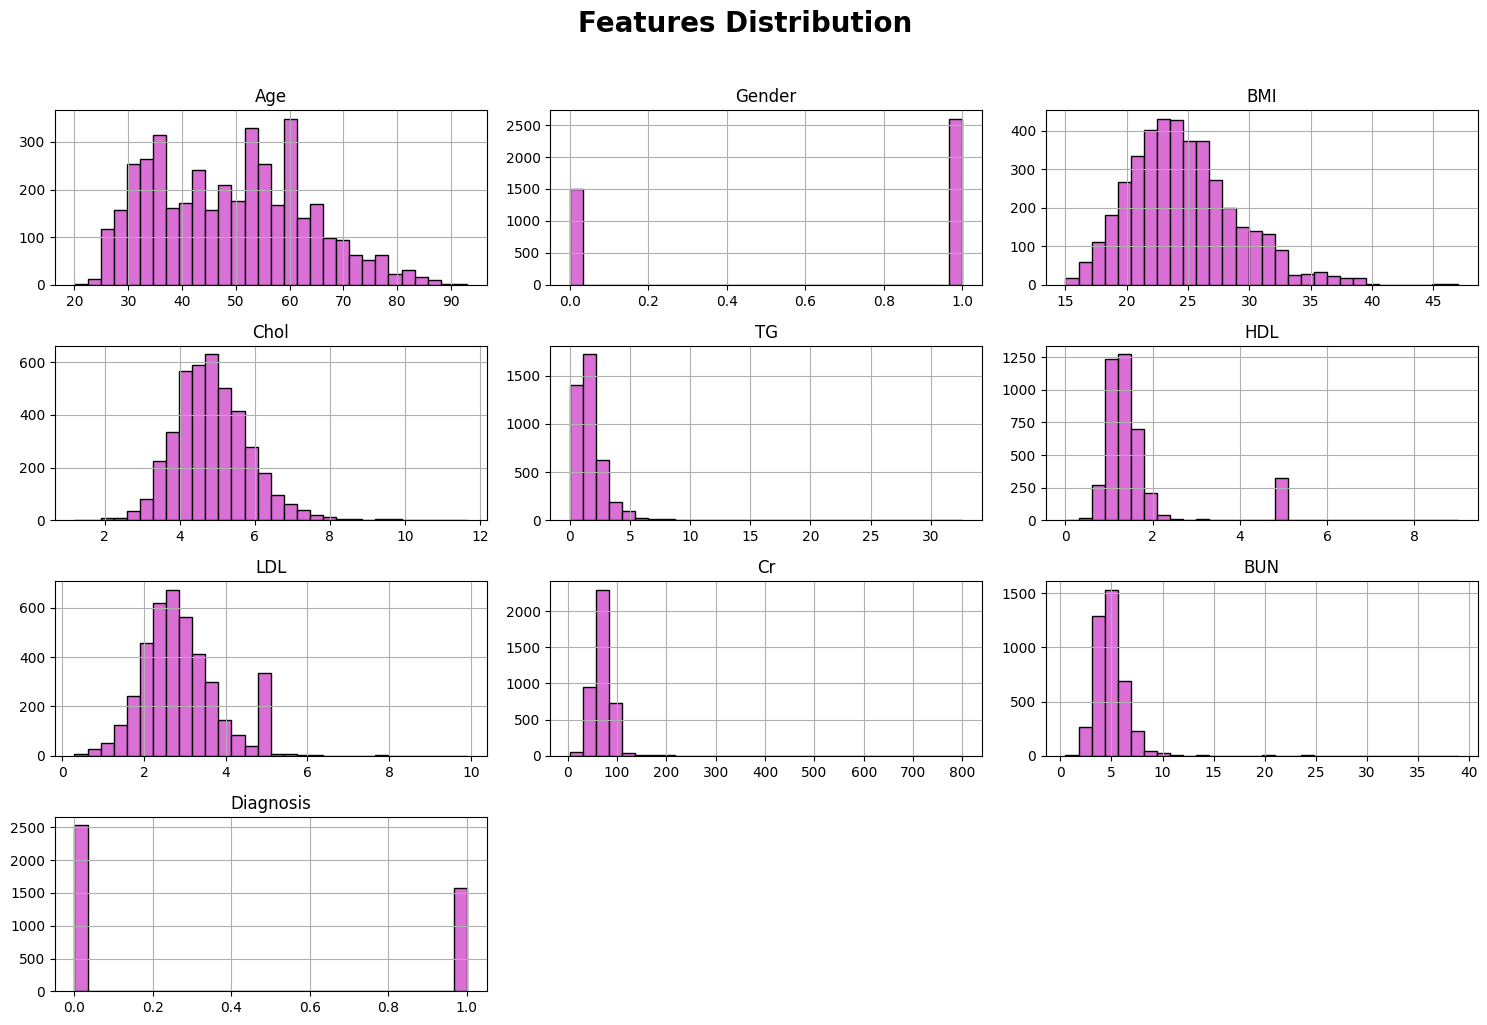

In [133]:
# Visualize distribution of features and target
def hist(train, color="orchid", title="Features Distribution"):
    train.hist(figsize=(15, 10), color=color, edgecolor="k", bins=30)
    plt.suptitle(title, fontsize=20, fontweight="bold", y=1.02)
    plt.tight_layout()
    plt.show()

hist(train)

#### Summary of column types:
- Numerical:
    - Age
    - BMI
    - Chol
    - TG
    - HDL
    - LDL
    - Cr
    - BUN
- Categorical: 
    - Gender
    - Diagnosis

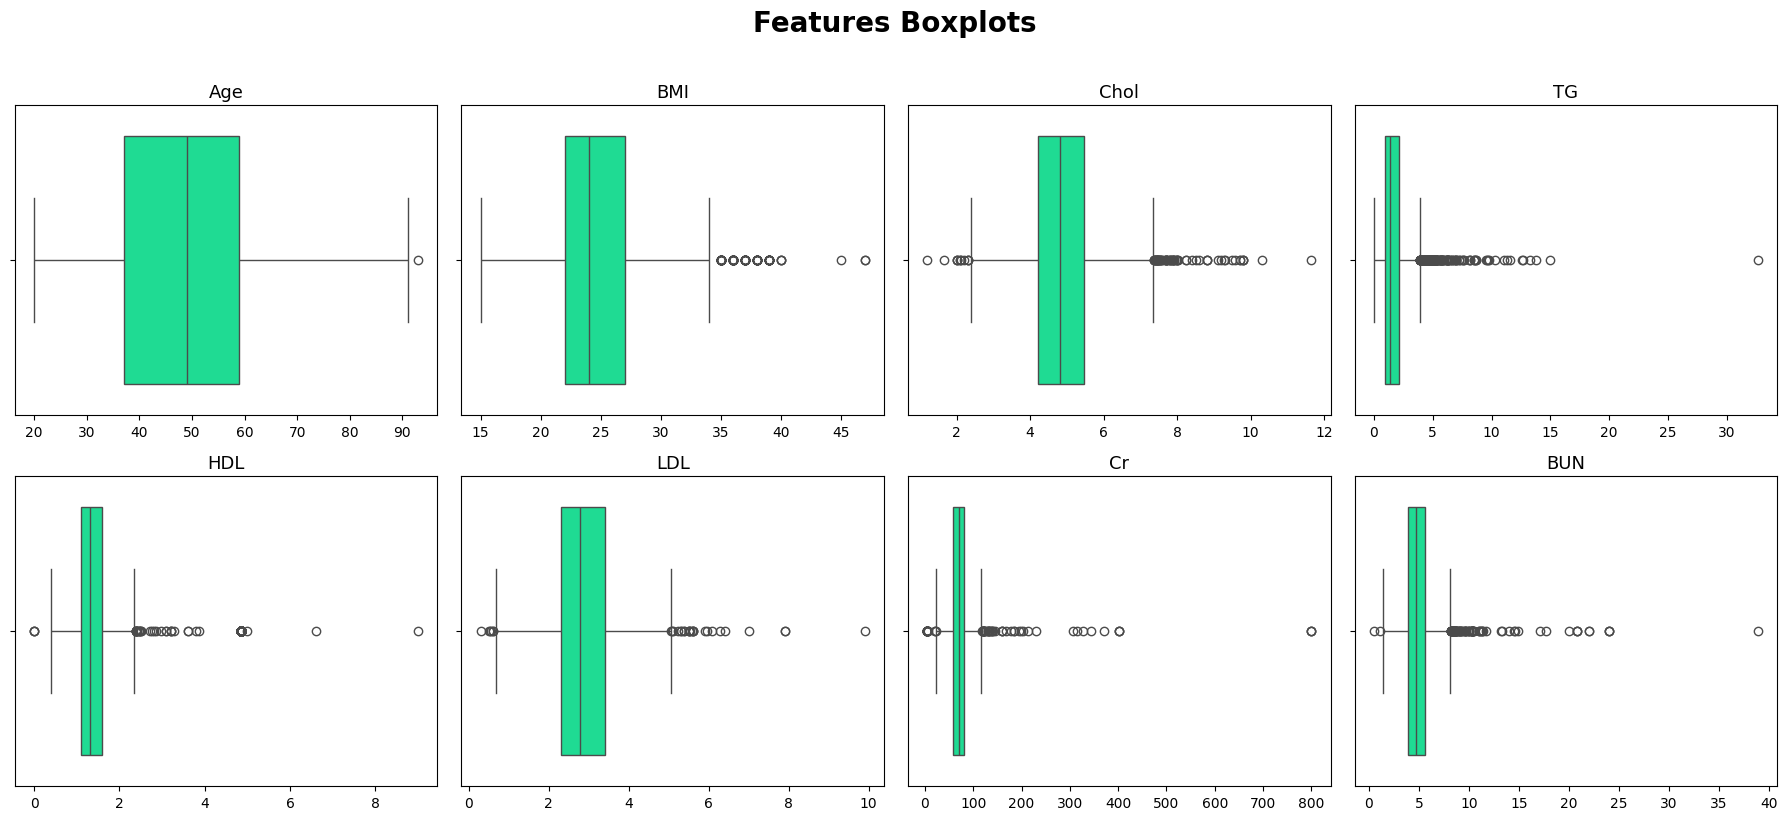

In [128]:
#----------------------------------------------
# Visualize numerical features by using Boxplot
#----------------------------------------------

def boxplot(train, color="mediumspringgreen", title="Features Boxplots"):
    # Figure
    fig, axes = plt.subplots(2, 4, figsize=(18, 8))
    axes = axes.flatten()
    # Visualize
    for i, col in enumerate(num_cols):
        sns.boxplot(data=train, x=col, ax=axes[i], color=color)
        axes[i].set_title(col, fontsize=13)
        axes[i].set_xlabel("")  # Remove x-labels for clean look

    plt.suptitle(title, fontsize=20, fontweight="bold", y=1.02)
    plt.tight_layout()
    plt.show()

# Get numerical features
num_cols = train.drop(columns=["Gender", "Diagnosis"])

boxplot(num_cols)


## 5. Check outliers & skewness of numerical features
By looking at the distribution plots (Histograms and Boxplots), We can kind of see and interpret the outliers and skewness but for more accuracy and analysis, we move further by calculating and constraining them and their ranges.

### - Outliers
Threshold of outliers:
- Mild outliers: `1.5×IQR to 3×IQR`
- Extreme outliers: `beyond 3×IQR`
> Generally, ≤5-6% outliers per feature is acceptable.

In [18]:
#-------------------------------------------
# Find potential outliers in numeric values
#-------------------------------------------

def outlier_detector(num_cols):
    # IQR method (1.5 * IQR) 
    outlier_info = [] 
    # Loop through numeric features
    for c in num_cols: 
        # Calculate Q1 -> 25%
        Q1 = num_cols[c].quantile(0.25) 
        # Calculate Q3 -> 75%
        Q3 = num_cols[c].quantile(0.75) 
        # Calculate IQR
        IQR = Q3 - Q1 
        # Calculate and determine lower and upper bounds
        lower = Q1 - 1.5 * IQR 
        upper = Q3 + 1.5 * IQR 
        # Filter outliers
        mask = (num_cols[c] < lower) | (num_cols[c] > upper) 
        # Count outliers
        n_out = mask.sum() 
        # Add all info to list (features, number of outliers, percentage of outliers)
        outlier_info.append((c, n_out, (n_out / len(num_cols) * 100).round(3)))

    # Convert to dataframe
    outlier_df = pd.DataFrame(outlier_info,
                            columns=['feature', 'n_outliers', 'outlier_pct']).sort_values('outlier_pct', ascending=False) 
    return outlier_df.reset_index(drop=True)

outlier_detector(num_cols)

,feature,n_outliers,outlier_pct
0,HDL,359,8.745
1,TG,218,5.311
2,BMI,122,2.972
3,BUN,91,2.217
4,Cr,81,1.973
5,Chol,77,1.876
6,LDL,31,0.755
7,Age,1,0.024


### - Skewness
Threshold of skewness:

- `|skew| < 0.5` → Almost symmetric → leave it as is
- `0.5 ≤ |skew| < 1` → Moderate skew → consider transforming (if it matters for your model)
- `|skew| ≥ 1` → High skew → strongly consider transformation

In [19]:
#----------------
# Check skewness
#----------------

def skewness_detector(num_cols):
    # Compute skewness for each numerical features and add to dict
    sk = {col: abs(num_cols[col].skew()) for col in num_cols}
    # Convert to dataframe
    skewness = pd.DataFrame(sk, index=[0])
    # Melt (for better inspection)
    skewness = pd.melt(skewness, var_name='Feature', value_name='Skewness')
    # Check if skewness is exceeding the threshold (skewness >= 1)
    skewness['Exceeding_Threshold'] = skewness['Skewness'] >= 1
    return skewness.sort_values(by="Skewness", ascending=False).reset_index(drop=True)

skewness_detector(num_cols)

,Feature,Skewness,Exceeding_Threshold
0,Cr,12.431950,True
1,TG,5.424035,True
2,BUN,4.952510,True
3,HDL,2.627336,True
4,BMI,0.828594,False
5,Chol,0.715975,False
6,LDL,0.699195,False
7,Age,0.279592,False


#### Considerations:
- **HDL** has a noticeable number of outliers and can be handled.
- **Cr, TG, BUN, HDL** are skewed and can be handled.

## 6. Check correlations
The baseline correlation could be Numeric → Numeric / Numeric → Target.

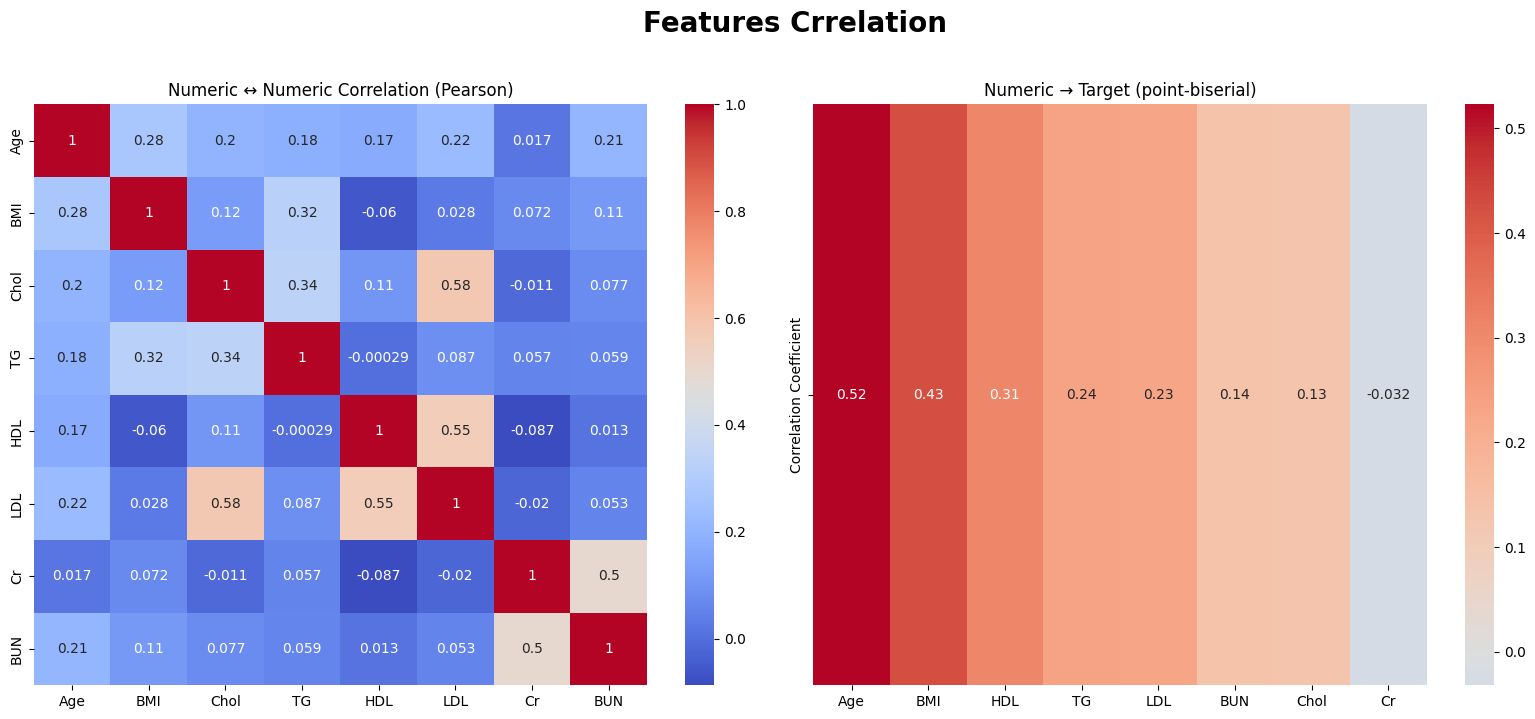

In [19]:
#---------------------------------------------------
# Calculate and Visualize Features and correlations
#---------------------------------------------------

# 1. Get Numeric features in the correct format
numeric_features = num_cols.columns.tolist()

# 2. Create a figure for Pearson & Point-biserial
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# 3. Numeric ↔ Numeric (Pearson)
# -----------------------------

# Compute corrlations of numeric features
corr = train[numeric_features].corr(method='pearson')
# Adjust and Visualize
sns.heatmap(corr, annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Numeric ↔ Numeric Correlation (Pearson)")

# 4. Feature ↔ Target
# -----------------------------

# Specify target column (For classification task in this case)
target_col = "Diagnosis" 

# numeric → target (signed)
# Compute corrlations of numeric features and target
num_corr = {c: pointbiserialr(train[c], train[target_col])[0] for c in numeric_features}

# Convert to dataframe
num_df = pd.DataFrame.from_dict(num_corr, orient='index',
                                 columns=['Correlation Coefficient']).sort_values(by='Correlation Coefficient', ascending=False).T
# Adjust and Visualize
sns.heatmap(num_df, annot=True, cmap="coolwarm", center=0, ax=axes[1])
axes[1].set_title("Numeric → Target (point-biserial)")
plt.suptitle("Features Crrelation", fontsize=20, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()


## 7. Check pairwise relationships
Pair plots to see the patterns and relationship between a set of features, like: 
- strong relationships between features 
- clusters 
- outliers 
- weird shapes

> **Note:** Among all the numerical features we have, we can only use the most correlated of them (let's say 5 most correlated features with the target), because if all of them be considered to be used it'll be unreadable and hard to analyze (8x8 = 64 plots), But we plot all of them to see haw they are correlated.

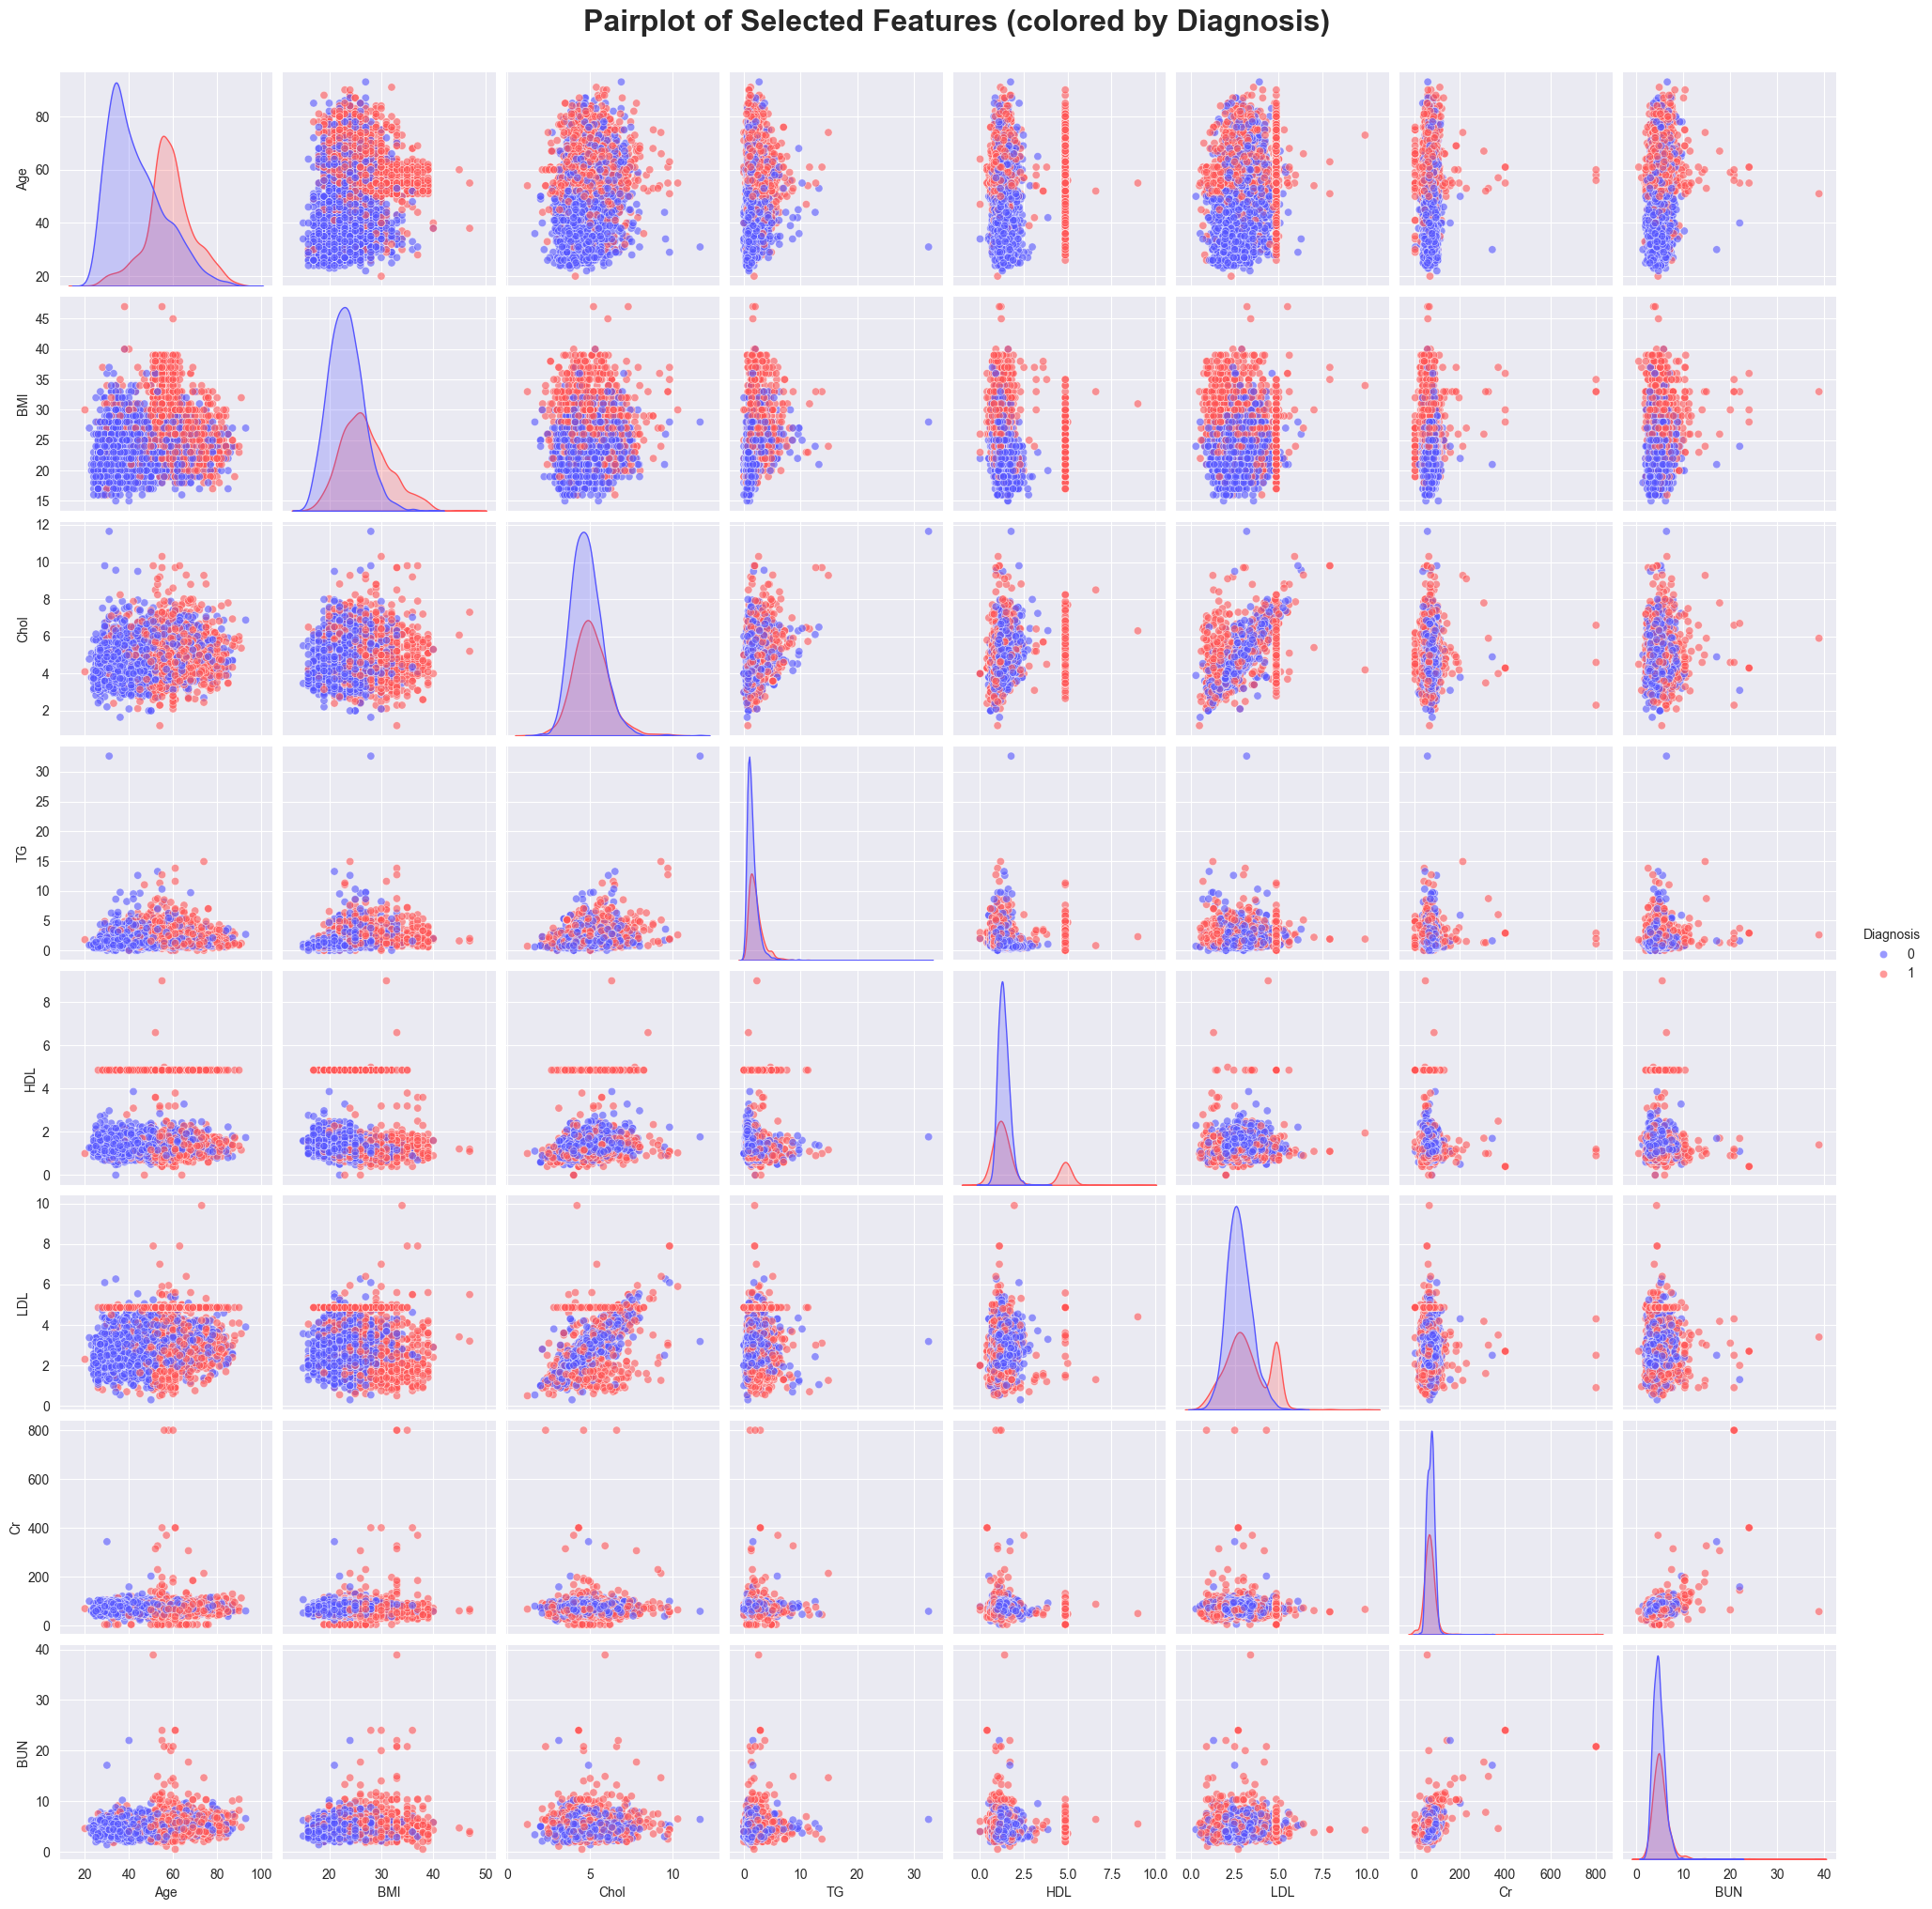

In [ ]:
#----------------------
# Visualize pairplots 
#----------------------

# Features + the target
selected = num_cols.columns.tolist() + target_col

# Visualize pairplots
sns.set_style("darkgrid")
sns.pairplot(
    train[selected],
    hue="Diagnosis",
    palette="seismic",
    plot_kws={'alpha': 0.6},
    diag_kind="kde"
)

plt.suptitle("Pairplot of Selected Features (colored by Diagnosis)",
              fontsize=23, fontweight="bold", y=1.02)
plt.show()


## 8. Check handling skewness & outliers
By looking at the visualizations and analysis we can see the datapoints far away from others
which potentially are the reason that some features are skewed and some have outliers. 
* Skewed features: Cr, TG, BUN, HDL
* Features that have outliers: HDL, TG

-> In this part, we'll check how to handle these problematic properties.

In [114]:
#----------------------------------------------
# Check if we exclude any data point greater than the range 
# or is invalid (like being 0) how `skewness` and `outliers` will change
#----------------------------------------------

# Cuttoff range for each one of the features:  Cr, TG, BUN, HDL
ranges ={
    "Cr": 300,
    "TG": 10,
    "BUN": 20,
    "HDL": 5
}

# Count how many data points pass these cutoff ranges + NOT Zero
counts = {feature: ((num_cols[feature] > range_) | (num_cols[feature] <= 0)).sum() for feature, range_ in ranges.items()}

# Convert to a dataframe
counts_df = pd.DataFrame(data=[counts]).drop_duplicates().melt(var_name="Feature", value_name="Counts")

counts_df


,Feature,Counts
0,Cr,11
1,TG,23
2,BUN,9
3,HDL,5


In [115]:
# Filteration: Below cutoff range + Not zero
filtered = num_cols[
    (num_cols[["Cr", "TG", "BUN", "HDL"]] > 0).all(axis=1) &
    (num_cols["Cr"] < ranges["Cr"]) &
    (num_cols["TG"] < ranges["TG"]) &
    (num_cols["BUN"] < ranges["BUN"]) &
    (num_cols["HDL"] < ranges["HDL"])
]
        

# Calculate skewness of each
skewness_detector(filtered)


,Feature,Skewness,Exceeding_Threshold
0,HDL,2.610677,True
1,TG,2.132202,True
2,BUN,1.074490,True
3,BMI,0.837066,False
4,LDL,0.709566,False
5,Chol,0.599324,False
6,Cr,0.508245,False
7,Age,0.285174,False


In [116]:
# calculate counts of outliers for each
outlier_detector(filtered)

,feature,n_outliers,outlier_pct
0,HDL,346,8.520
1,TG,205,5.048
2,BMI,119,2.930
3,BUN,77,1.896
4,Chol,72,1.773
5,Cr,67,1.650
6,LDL,31,0.763
7,Age,0,0.000


In [117]:
#---------------------------------------
# Check dataset before/after filtration
#---------------------------------------

# Shape of filtered dataset, Counts & Percentage of samples removed
dif = train.shape[0] - filtered.shape[0]
pct = round((dif/train.shape[0]) * 100, 3)
print(f"Shape of filtered dataset: {filtered.shape}\nCounts of samples removed: {dif}\nPercentage of samples removed: {pct}%")

Shape of filtered dataset: (4061, 8)
Counts of samples removed: 44
Percentage of samples removed: 1.072%


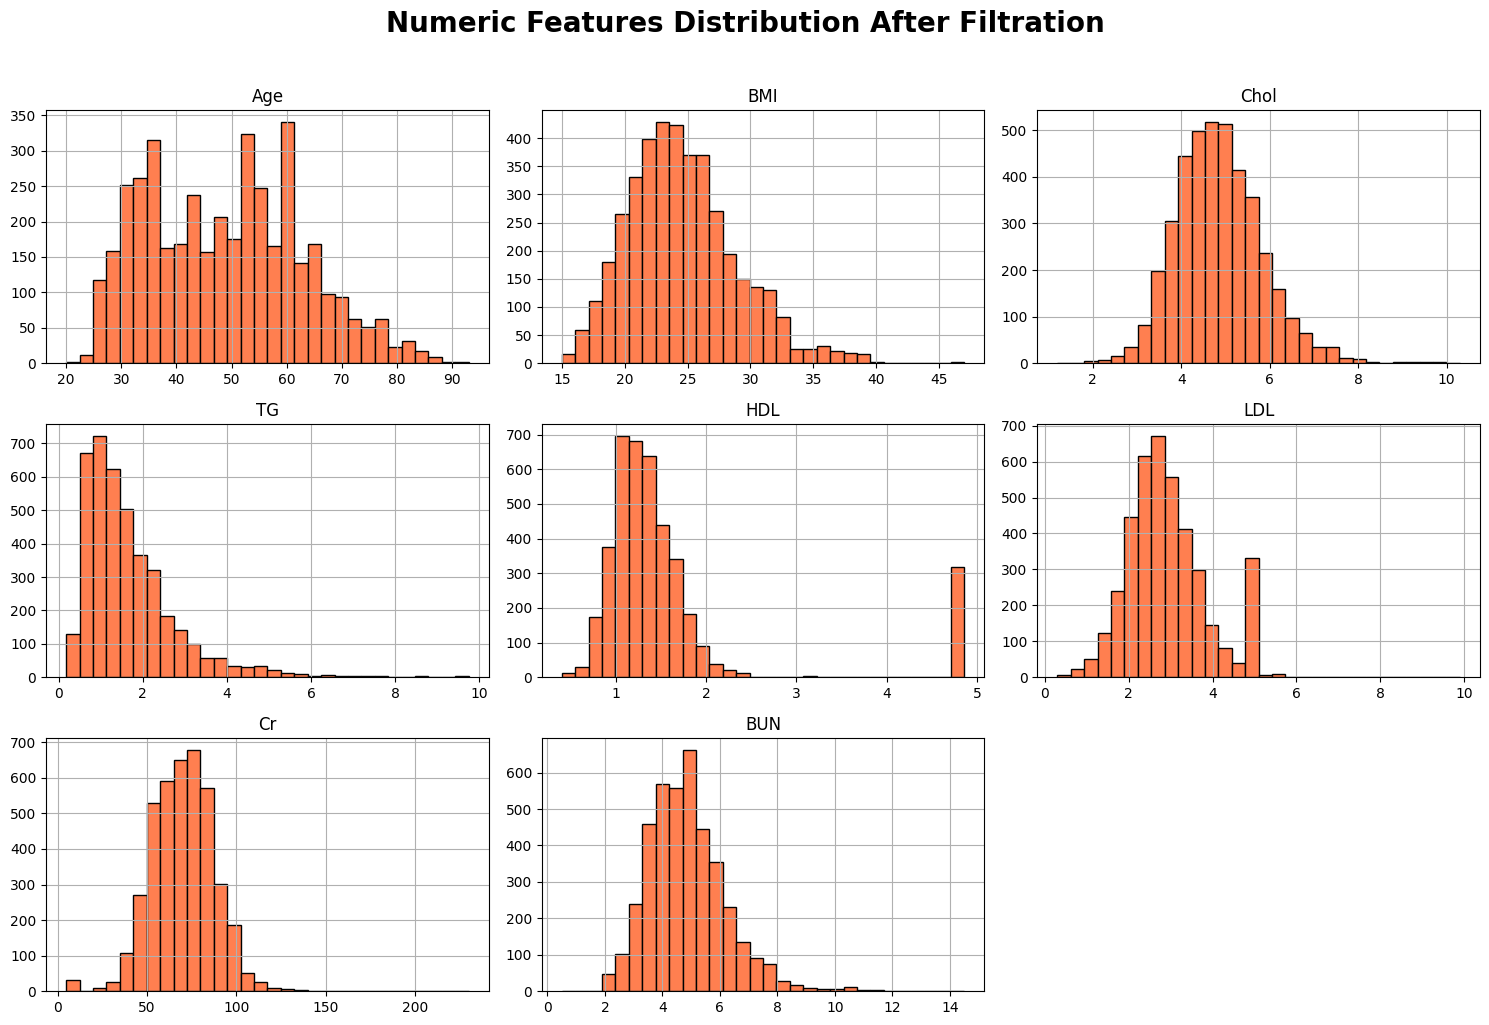

In [130]:
# Histogram after filtration (numeric features)
hist(filtered, "coral", "Numeric Features Distribution After Filtration")

> HDL and LDL exhibit a bimodal pattern with a notable spike near 4.86, likely caused by rounding or measurement capping.
Although this introduces slight skewness, the features still contain valuable information and were retained.
After removing invalid (zero) values and filtration, both distributions improved significantly.
The potential influence of this artifact will be assessed during model evaluation.

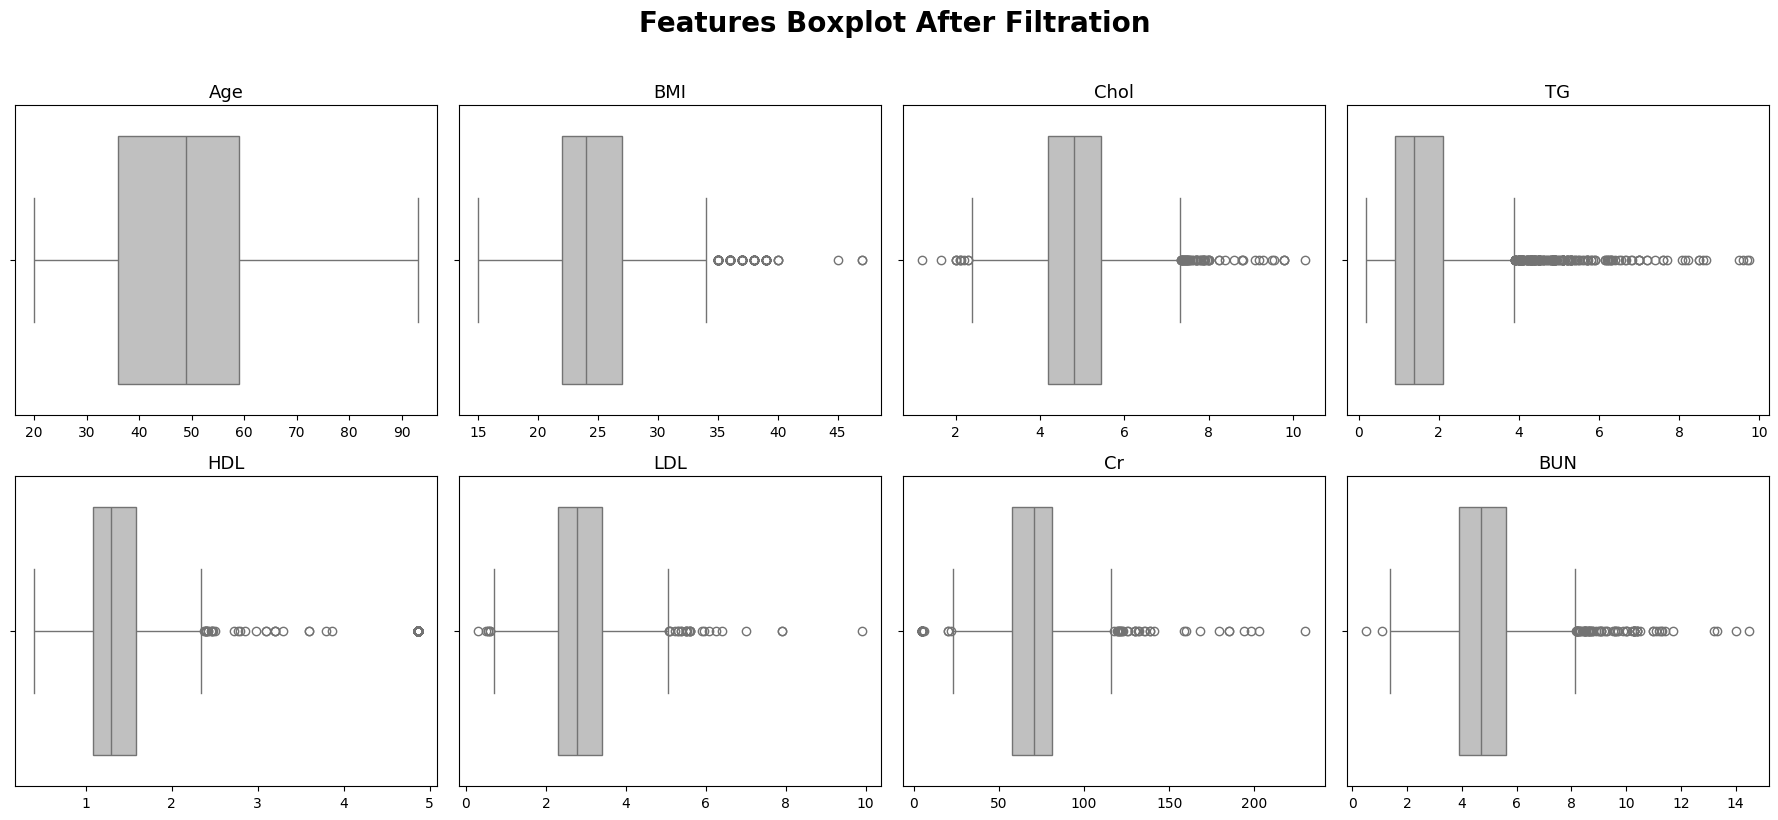

In [131]:
# Boxplot after filtration
boxplot(filtered, "silver", "Features Boxplot After Filtration")

> So we saw after applying `Filtration`, Skewness of the features significantly was reduced. although `HDL`, `TG` and `BUN` are still a little skewed therefore in order to handle them further we can use Transformation Methods such as `log1p`.

##### Check log1p transformation

In [113]:
# Apply log1p transformation on HDL, TG, BUN
transformed = {f: np.log1p(filtered[f]).skew() for f in ["HDL", "TG", "BUN"]}

# Convert to a dataframe
transformed_df = pd.DataFrame(data=[transformed]).drop_duplicates().melt(var_name="Feature", value_name="Skewness")
transformed_df

,Feature,Skewness
0,HDL,2.000361
1,TG,0.757443
2,BUN,0.048452
